In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading Data

df = pd.read_csv('Heart Attack DataSet.csv')

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape

(303, 14)

In [11]:
# Null value detection

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


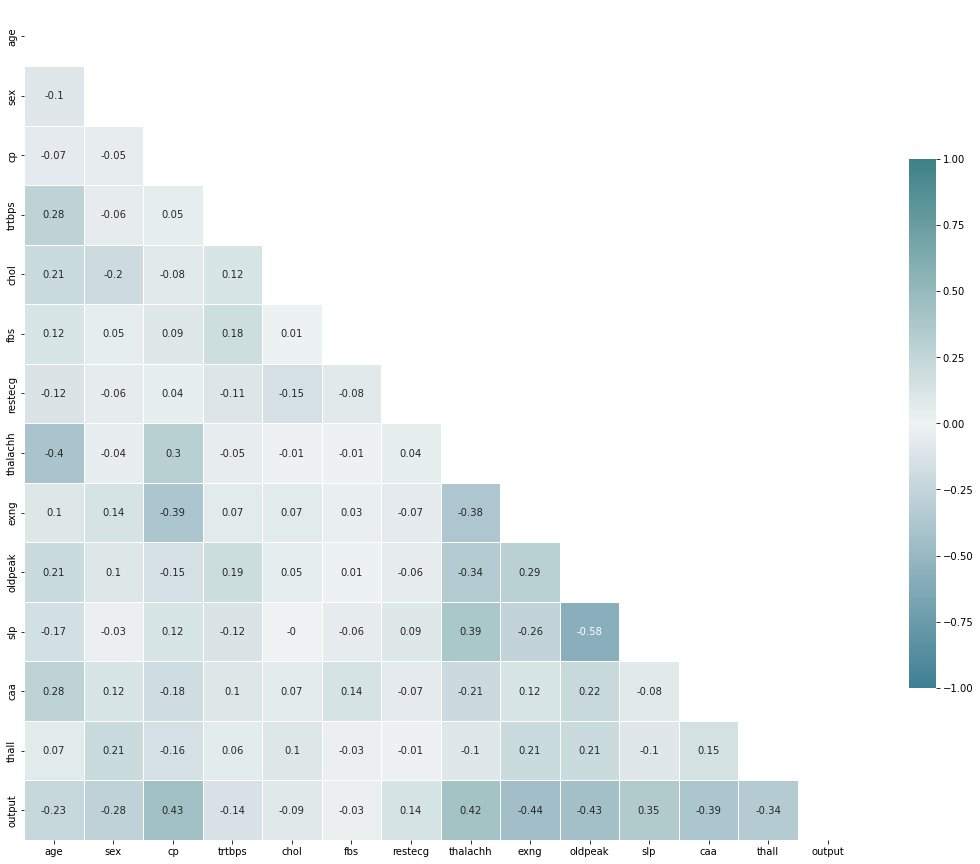

In [22]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

In [23]:
# Primary Statistical Findings

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# Feature Engineering and EDA
# Change column names

df.rename(columns = {'cp':'Chest Pain','trtbps':'rest BP','chol':'cholestrol','fbs':'fasting blood sugar','thalachh':'max heart rate','exng':'exercise angina','slp':'slope','caa':'Major vessels'},inplace=True)

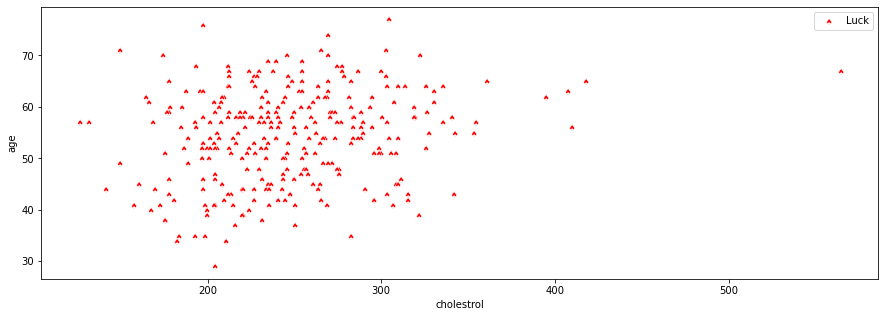

In [25]:
fig = plt.figure(figsize=(15,5))
sns.scatterplot('cholestrol','age',data=df, alpha=1,color = 'red',marker=r'$\spadesuit$',label="Luck")
plt.show()

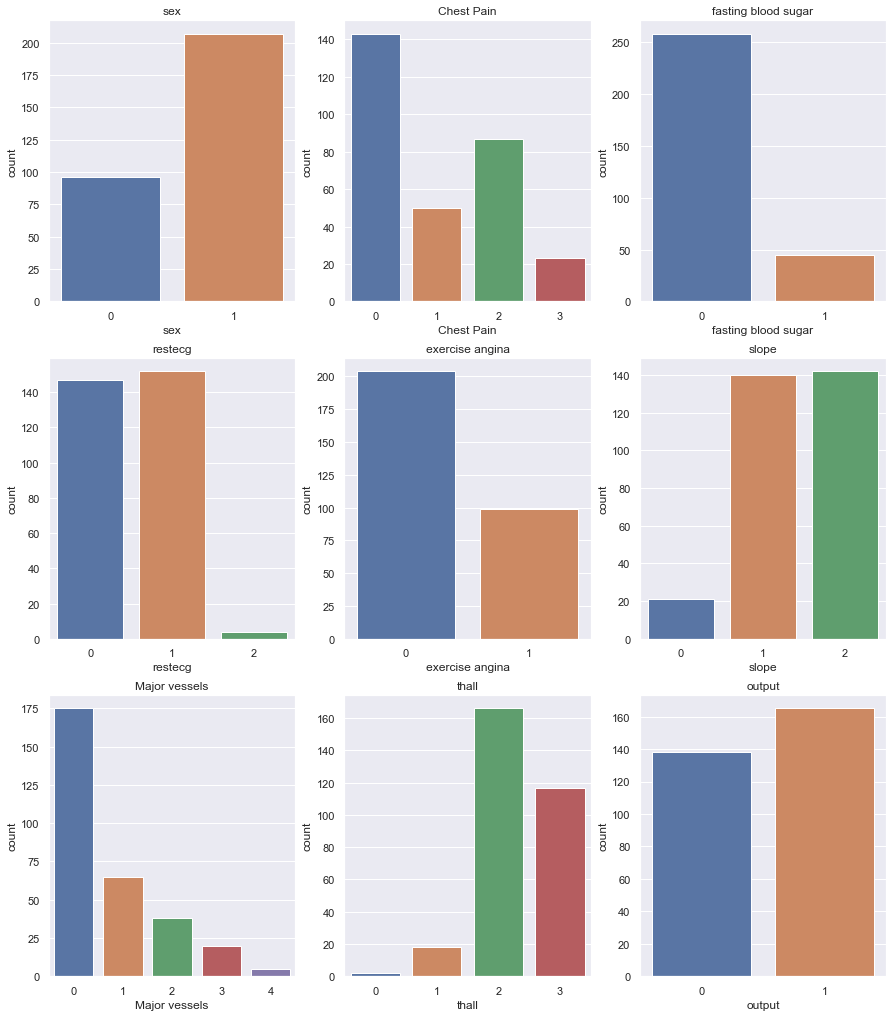

In [26]:
# Check Count data in every feature

df1 = df[['sex', 'Chest Pain','fasting blood sugar', 'restecg', 'exercise angina', 'slope', 'Major vessels', 'thall', 'output']]
fig1 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1).set(title='{}'.format(i[1]))
plt.show()

In [27]:
# Observations:
# Male count is higher than female count by 100%
# fasting blood sugar is not so significant to determine the output as there is a huge difference between common and uncommon case.
# upsloping and downsloping count is higher than normal count

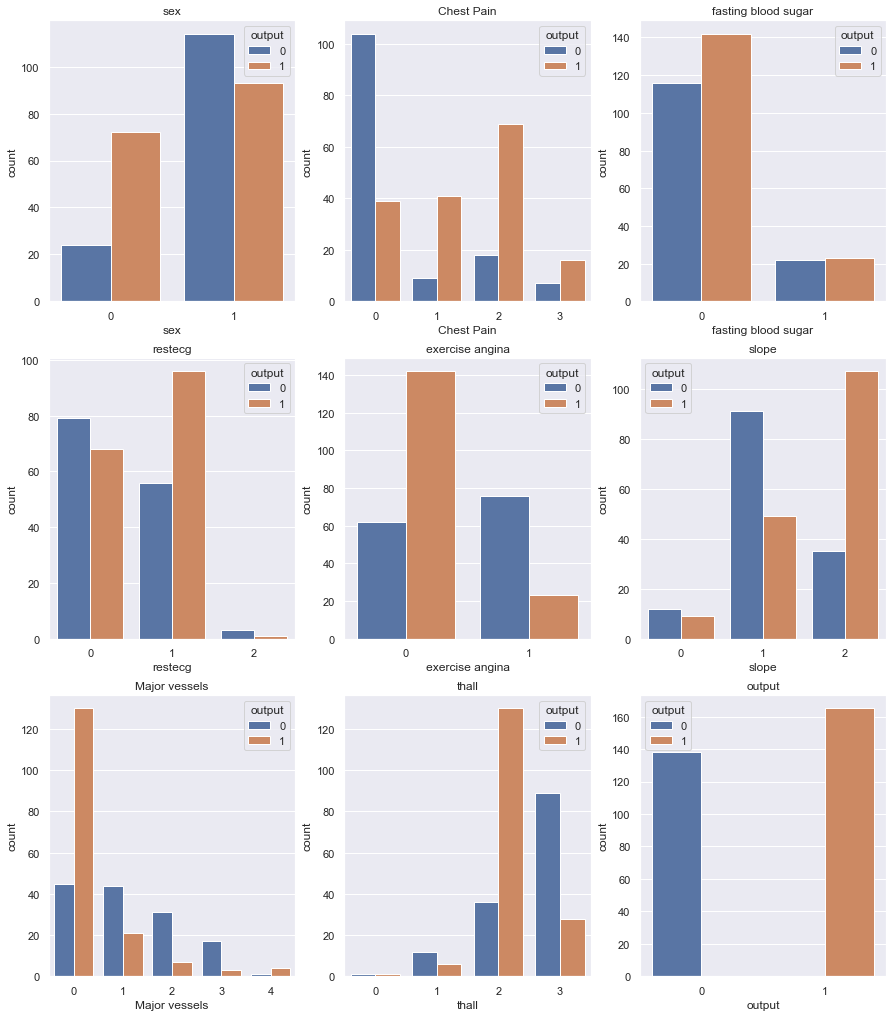

In [28]:
# Check the count of every feature with respect to output to understand the difference.

fig3 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df1):
  plt.subplot(5,3,i[0]+1)
  ax = sns.countplot(i[1],data=df1,hue='output').set(title='{}'.format(i[1]))
plt.show()

In [29]:
# Observations

# Heart stroke happening count is high in female hat male
# Blckig of major vessels in igh during heart attack and its evident from here

In [31]:
# Outlier Detection

# To analyse outlier detection ets boxplot and using Intequartile range lets remove them

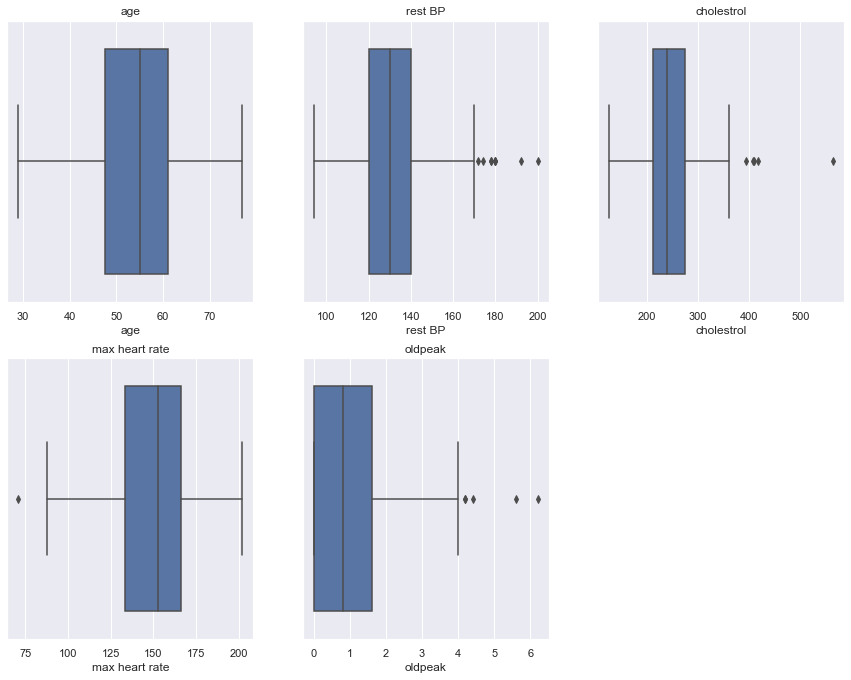

In [32]:
 df2 = df[['age','rest BP', 'cholestrol','max heart rate','oldpeak']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df2):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df2).set(title='{}'.format(i[1]))
plt.show()

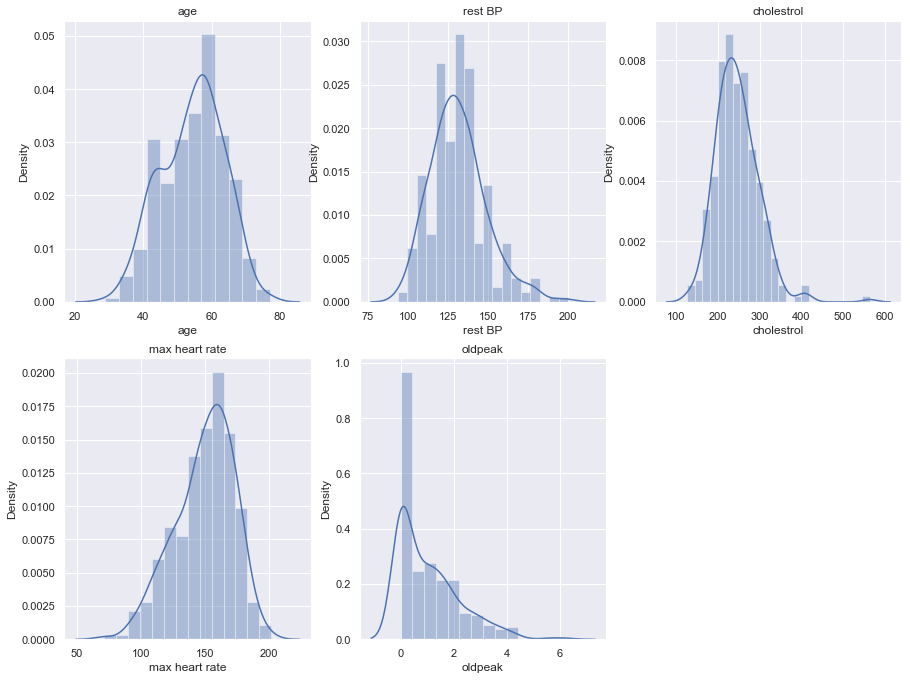

In [33]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i in enumerate(df2) :
    plt.subplot(5,3,i[0]+1)
    ax = sns.distplot(df2[i[1]]).set(title='{}'.format(i[1]))
plt.show()    

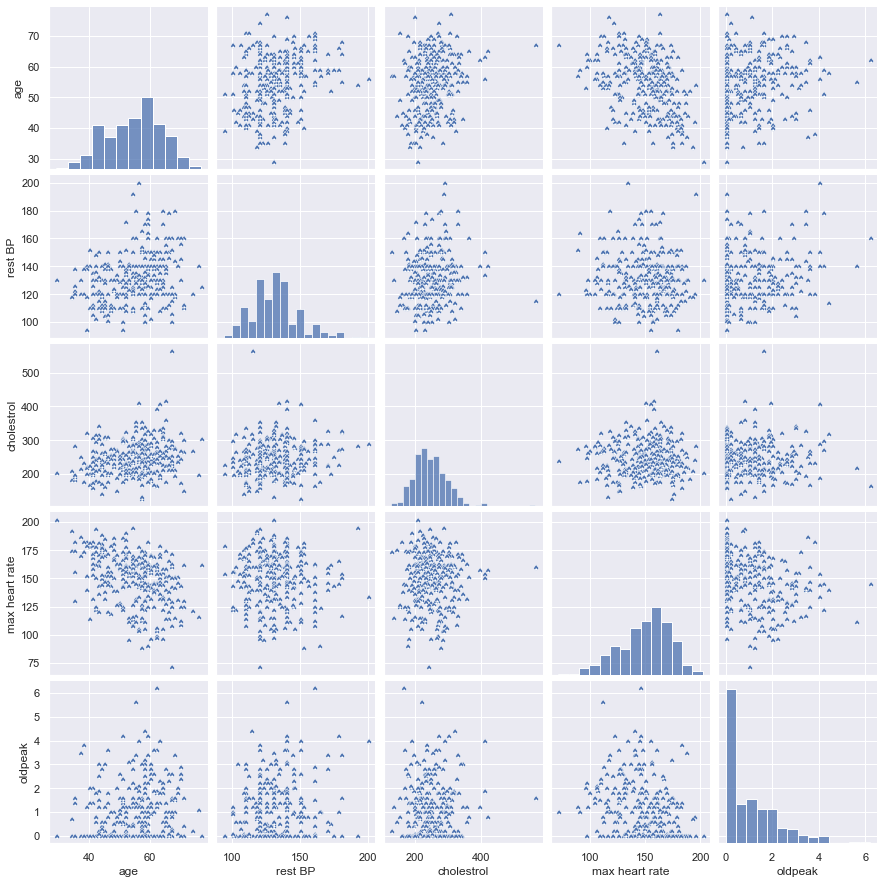

In [34]:
sns.pairplot(data=df2,palette='reds',markers=r'$\spadesuit$')
plt.show()

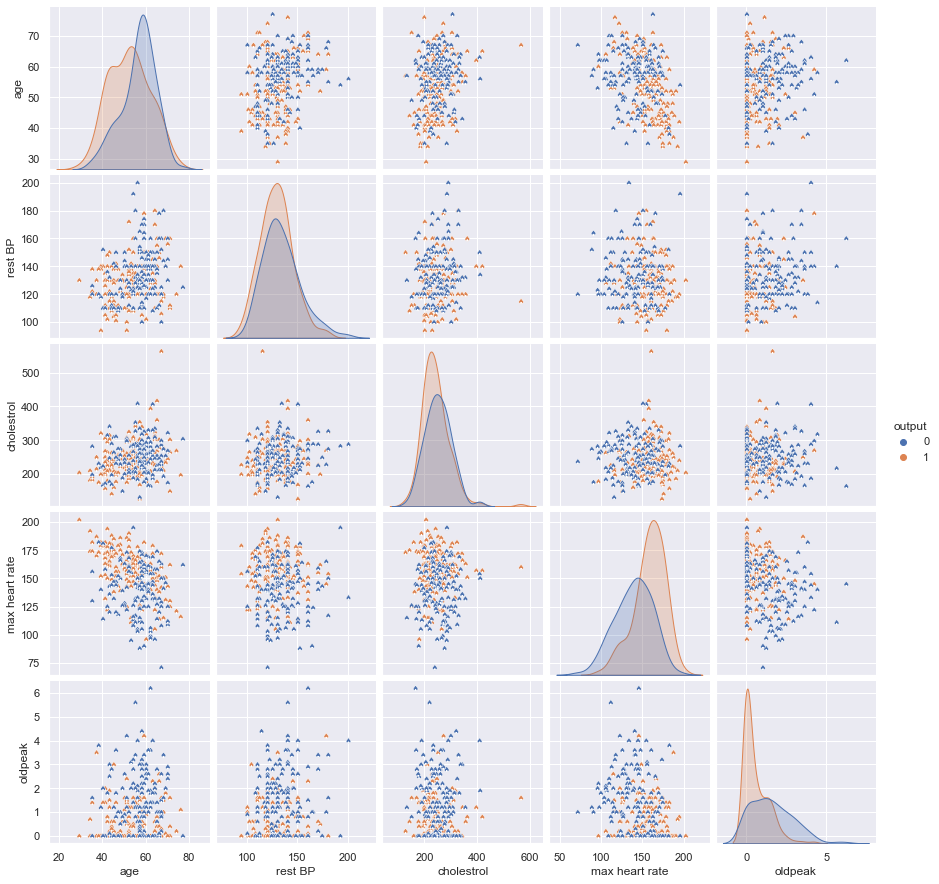

In [36]:
df3 = df[['age','rest BP', 'cholestrol','max heart rate','oldpeak','output']]
sns.pairplot(data=df3,hue='output',markers=r'$\spadesuit$')
plt.show()

In [37]:
# From both the above plots, we can observe collinearity. For Example. Age And Cholestrol

In [38]:
#Its Time to remove Outliers!!!

# It is evident from the above plot that we have one outlier in oldpeak and one outlier in Cholestrol. Lets remove them!!

In [39]:
df[df['oldpeak']>=5]

,age,sex,Chest Pain,rest BP,cholestrol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,Major vessels,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [40]:
df[df['cholestrol']>500]

,age,sex,Chest Pain,rest BP,cholestrol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,Major vessels,thall,output
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [41]:
df.drop([204,221,85],inplace=True)

In [42]:
df.shape

(300, 14)

In [43]:
# Grouping a Few Features and Anayse Them

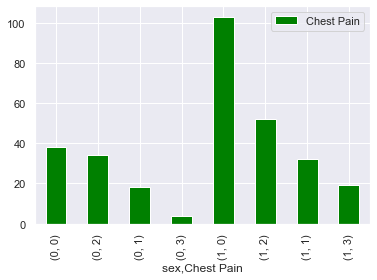

In [44]:
df.groupby(['sex'])['Chest Pain'].value_counts().plot(kind='bar',color='Green')
plt.legend()
plt.show()

In [45]:
# Chest Pain in Females Vr Males is evident with former higher with nearly 40%
# Asymptotics pains are very few when compared with the risky ones

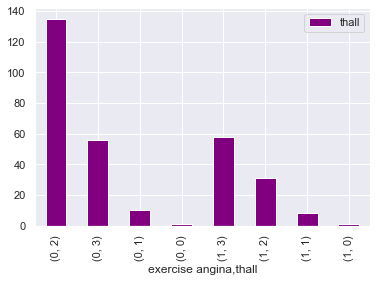

In [46]:
df.groupby(['exercise angina'])['thall'].value_counts().plot(kind='bar',color='purple')
plt.legend()
plt.show()

In [47]:
# Blockage of blood vessels has not shown any significant relation with symptoms of Exercise Attacks.

# Feature Selection

In [48]:
# Using chi2 Function

In [49]:
from sklearn.feature_selection import SelectKBest,chi2         
#feature selection package is selected and selectkbest is imported to choose the best features

x =df.iloc[:,:-1]                                                                       
#Rows from school_closing to facial_coverings

y =df.iloc[:,-1]         
#y on confirmed cases

bestfeatures = SelectKBest(score_func=chi2,k=10)               
#best features are given using selectkbest function, where test is chi_square function. k is degrees of freedom

fit = bestfeatures.fit(x,y)                                                           
#degrees of freedom is taken as categories-1

dfscores  =pd.DataFrame(fit.scores_)                                     
#the data is fit using fit function and the scores and columns are assigned respectively

dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)      
#concatenating both the columns to a dataframe

featureScores.columns = ['Specs', 'Score']                           
#giving them column names. 

featureScores.nlargest(14,'Score')

,Specs,Score
7,max heart rate,182.870422
9,oldpeak,66.073301
11,Major vessels,64.811986
2,Chest Pain,60.256120
4,cholestrol,41.510897
8,exercise angina,38.487461
0,age,23.752911
3,rest BP,12.906241
10,slope,9.025932
1,sex,7.535210


In [50]:
 # Using f_classif function

In [51]:
from sklearn.feature_selection import SelectKBest,f_classif         
#feature selection package is selected and selectkbest is imported to choose the best features

x =df.iloc[:,:-1]                                                                       
#Rows from school_closing to facial_coverings

y =df.iloc[:,-1]                                                                            
#y on confirmed cases

bestfeatures = SelectKBest(score_func=f_classif,k=10)               
#best features are given using selectkbest function, where test is chi_square function. k is degrees of freedom

fit = bestfeatures.fit(x,y)                                                           
#degrees of freedom is taken as categories-1

dfscores  =pd.DataFrame(fit.scores_)                                     
#the data is fit using fit function and the scores and columns are assigned respectively

dfcolumns = pd.DataFrame(x.columns)     

featureScores = pd.concat([dfcolumns,dfscores],axis=1)      
#concatenating both the columns to a dataframe

featureScores.columns = ['Specs', 'Score']                          
#giving them column names. 

featureScores.nlargest(14,'Score')

,Specs,Score
8,exercise angina,70.143020
9,oldpeak,67.650258
2,Chest Pain,66.918431
7,max heart rate,63.053183
11,Major vessels,53.468025
12,thall,39.802983
10,slope,38.761067
1,sex,25.970022
0,age,16.423808
6,restecg,6.069143


# Forward Feature Selection

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.metrics import f1_score
def evaluate_metric(model, x_cv, y_cv):
    return f1_score(y_cv, model.predict(x_cv), average='micro')

In [54]:
def forward_feature_selection(model,x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = []  
        model = model 
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True)
        feature_set.append(metric_list[0][1])
    return feature_set

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
forward_feature_selection(lr,X_train,X_test,y_train,y_test,10)

['Chest Pain',
 'cholestrol',
 'fasting blood sugar',
 'oldpeak',
 'thall',
 'age',
 'rest BP',
 'Major vessels',
 'exercise angina',
 'slope']

# Recursive Feature Elimination With Cross Validation

In [65]:
# Train Test Split

In [66]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=lr, step=1, min_features_to_select=8,cv=4,verbose=1,n_jobs=-1)
rfecv.fit(X,y)
rfecv.transform(X)
print(); print(rfecv)
print(); print('Optimal no of features: {}'.format(rfecv.n_features_))
print(); print(np.where(rfecv.support_==False)[0])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.

RFECV(cv=4, estimator=LogisticRegression(), min_features_to_select=8, n_jobs=-1,
      verbose=1)

Optimal no of features: 9

[0 3 4]


In [69]:
df.shape

(300, 13)

# Statistical Findings

In [70]:
def central_tendency(df,col_list):                                            #defining a function to find mean, median and mode to all the columns 
        mean_col, median_col,mode_col = [],[],[]                        #taking three empty columns to add the data
        percentile_90,percentile_95 = [],[]                                    #90%, 95% percentile values
        upper_limit,lower_limit,zscore = [],[],[]                              #Using the 99.97% shuffle to remove outliers
        for col in col_list:                                                             # for loop for processing the data
            ser = df[col]                                                                  #adding column by column to a reference
            mean_col.append(ser.mean())                                      #calculating mean and adding that to mean column
            median_col.append(ser.median())                                #calculating median and adding that to median column
            mode_col.append(ser.mode())                                     ##calculating mode and adding that to mode column
            upper_limit.append(ser.mean() + 3*ser.std())               #calculating upper limit for 3 times the std deviation for each column
            lower_limit.append(ser.mean() - 3*ser.std())                #calculating upper limit for 3 times the std deviation for each column
            percentile_90.append(np.percentile(ser,90))                #percentile 90% for all columns
            percentile_95.append(np.percentile(ser,95))                #percentile 95% for all columns
    
        return mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 #return the columns to use it in the next function to plot the data
    
col_list = df.columns                                                                #accessing list of columns
mean_col,median_col,mode_col,upper_limit,lower_limit,percentile_90,percentile_95 = central_tendency(df,col_list) 
df_stats = pd.DataFrame({'columns':col_list,'mean':mean_col,'median':median_col,'upper limit':upper_limit,'lower limit':lower_limit,'90 percentile':percentile_90,'95 percentile':percentile_95})                 #calling the central tendency function
df_stats

,columns,mean,median,upper limit,lower limit,90 percentile,95 percentile
0,age,54.296667,55.00,81.558274,27.035060,66.00,68.00
1,sex,0.686667,1.00,2.080538,-0.707204,1.00,1.00
2,Chest Pain,0.970000,1.00,4.067399,-2.127399,2.00,3.00
3,rest BP,131.556667,130.00,184.105174,79.008160,152.00,160.20
4,cholestrol,245.576667,240.50,390.999739,100.153594,308.10,326.05
5,restecg,0.530000,1.00,2.108037,-1.048037,1.00,1.00
6,max heart rate,149.756667,153.00,218.460751,81.052582,177.10,182.00
7,exercise angina,0.326667,0.00,1.736000,-1.082667,1.00,1.00
8,oldpeak,1.005333,0.75,4.292729,-2.282062,2.62,3.21
9,slope,1.410000,1.00,3.234334,-0.414334,2.00,2.00


In [71]:
import scipy.stats
scipy.stats.ttest_ind(df[df['sex']==1]['cholestrol'],df[df['sex']==0]['cholestrol'])

Ttest_indResult(statistic=-3.3226189011072624, pvalue=0.0010029561854722206)

In [72]:
value = scipy.stats.ttest_ind(df[df['sex']==1]['cholestrol'],df[df['sex']==0]['cholestrol'])
print(value)
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Ttest_indResult(statistic=-3.3226189011072624, pvalue=0.0010029561854722206)
Reject the null hypothesis


In [73]:
import scipy.stats
scipy.stats.ttest_ind(df['cholestrol'],df['max heart rate'])

Ttest_indResult(statistic=30.956767431412338, pvalue=2.5954569658765944e-126)

In [74]:
value = scipy.stats.ttest_ind(df['cholestrol'],df['max heart rate'])
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [75]:
import scipy.stats
scipy.stats.ttest_ind(df['age'],df['Chest Pain'])

Ttest_indResult(statistic=100.99262479097929, pvalue=0.0)

In [76]:
value = scipy.stats.ttest_ind(df['age'],df['Chest Pain'])
if value[1]<0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


# Machine Learning Models

In [ ]:
# Train Test Split

In [77]:
from sklearn.preprocessing import StandardScaler    
#Importing standaard scalar to make the mean 0 and sd = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                                
#Initial set of available data helping program to understand how to apply technology
X_test = sc.fit_transform(X_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

In [79]:
from sklearn.linear_model import LogisticRegression 
#Import Logistic Regression
lr = LogisticRegression()

lr.fit(X_train,y_train) 
#fit the data
y_pred_lr = lr.predict(X_test) 
#predict the X_test

acc_lr = accuracy_score (y_test, y_pred_lr)
print('Accuracy of logistic Regression: ',acc_lr)

cm_lr = confusion_matrix (y_test, y_pred_lr)
print('Confusion matrix Logistic Regression: \n',cm_lr)

cr_lr = classification_report(y_test,y_pred_lr)
print('Classification report Logistic Regression \n',cr_lr)

pr_lr = precision_score(y_test,y_pred_lr)
re_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)

Accuracy of logistic Regression:  0.8833333333333333
Confusion matrix Logistic Regression: 
 [[25  4]
 [ 3 28]]
Classification report Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.90      0.89        31

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



# ROC_AUC Curve

In [80]:
y_predicted_probs = lr.predict_proba(X_test)[:,:] 
#Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, 
                                    columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.562970,0.437030
1,0.972221,0.027779
2,0.049938,0.950062
3,0.031816,0.968184
4,0.687513,0.312487


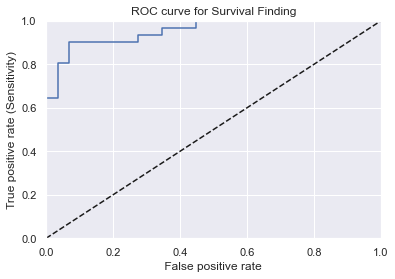

In [81]:
y_predicted_probs_yes=lr.predict_proba(X_test) 
#ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9532814238042269

# Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(lr, X,y, cv=5)

print(score_lr)
print(" Logistic Regression Accuracy: %0.2f (+/- %0.2f)" %  (score_lr.mean(), score_lr.std() * 2))

[0.81666667 0.86666667 0.85       0.86666667 0.75      ]
 Logistic Regression Accuracy: 0.83 (+/- 0.09)


# K-Nearest Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier ()
classifier_knn.fit (X_train, y_train)

y_pred_knn =classifier_knn.predict(X_test) 
#predict the X_test

acc_knn = accuracy_score (y_test, y_pred_knn)
print('Accuracy of KNeighborsClassifier: ',acc_knn)
cm_knn= confusion_matrix (y_test, y_pred_knn)
print('Confusion matrix KNeighborsClassifier: \n',cm_knn)
cr_knn = classification_report(y_test,y_pred_knn)
print('Classification report KNeighborsClassifier \n',cr_knn)

pr_knn = precision_score(y_test,y_pred_knn)
re_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

Accuracy of KNeighborsClassifier:  0.9
Confusion matrix KNeighborsClassifier: 
 [[24  5]
 [ 1 30]]
Classification report KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        31

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



# ROC_AUC Curve

In [85]:
y_predicted_probs = classifier_knn.predict_proba(X_test)[:,:] 
#Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.8,0.2
1,1.0,0.0
2,0.2,0.8
3,0.0,1.0
4,0.4,0.6


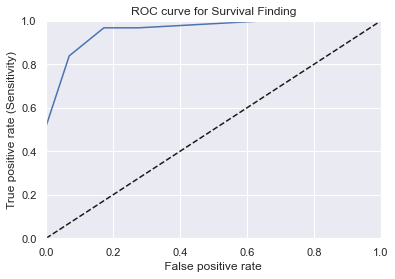

In [86]:
y_predicted_probs_yes=classifier_knn.predict_proba(X_test) 
#ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9582869855394883

# Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score
score_knn=cross_val_score(classifier_knn, X,y, cv=5)
print(score_knn)
print(" K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

[0.61666667 0.65       0.58333333 0.73333333 0.65      ]
 K-Nearest Neighbors Accuracy: 0.65 (+/- 0.10)


In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit (X_train, y_train)
Y_pred_dtc = classifier_dtc.predict (X_test)
acc_dtc = accuracy_score (y_test, Y_pred_dtc)
print('Accuracy of DecisionTreeClassifier: ',acc_dtc)
cm_dtc = confusion_matrix (y_test, Y_pred_dtc)
print('Confusion matrix DecisionTreeClassifier: \n',cm_dtc)
cr_dtc = classification_report(y_test,Y_pred_dtc)
print('Classification report DecisionTreeClassifier \n',cr_dtc)
pr_dtc = precision_score(y_test,Y_pred_dtc)
re_dtc = recall_score(y_test,Y_pred_dtc)
f1_dtc = f1_score(y_test,Y_pred_dtc)

Accuracy of DecisionTreeClassifier:  0.8
Confusion matrix DecisionTreeClassifier: 
 [[24  5]
 [ 7 24]]
Classification report DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.77      0.80        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



# ROC_AUC Curve

In [90]:
y_predicted_probs = classifier_dtc.predict_proba(X_test)[:,:] 
#Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


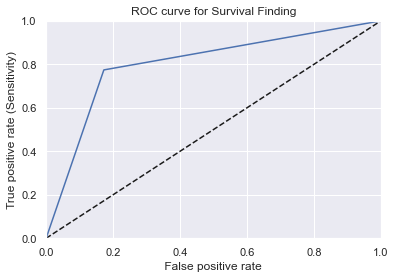

In [91]:
y_predicted_probs_yes=classifier_dtc.predict_proba(X_test) 
#ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.8008898776418243

# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(classifier_dtc, X,y, cv=10)
print(score_tree)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))

[0.76666667 0.8        0.9        0.76666667 0.76666667 0.73333333
 0.63333333 0.83333333 0.7        0.76666667]
Decision Tree Accuracy: 0.77 (+/- 0.14)


# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
acc_naive = metrics.accuracy_score(y_pred2,y_test)
print('Accuracy of Naive Bayes= ',acc_naive)
cm_naive = confusion_matrix (y_test, y_pred2)
print('Confusion matrix Naive Bayes: \n',cm_naive)
cr_naive = classification_report(y_test,y_pred2)
print('Classification report Naive Bayes \n',cr_naive)
pr_naive = precision_score(y_test,y_pred2)
re_naive = recall_score(y_test,y_pred2)
f1_naive = f1_score(y_test,y_pred2)

Accuracy of Naive Bayes=  0.9166666666666666
Confusion matrix Naive Bayes: 
 [[27  2]
 [ 3 28]]
Classification report Naive Bayes 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.93      0.90      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# ROC_AUC Curve

In [95]:
y_predicted_probs = gnb.predict_proba(X_test)[:,:] #Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.556902,0.443098
1,0.999618,0.000382
2,0.003964,0.996036
3,0.004704,0.995296
4,0.328696,0.671304


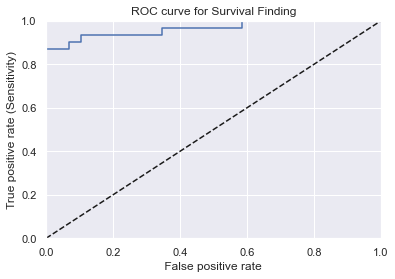

In [96]:
y_predicted_probs_yes=gnb.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.96440489432703

# Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score
score_naive=cross_val_score(gnb, X,y, cv=5)
print(score_naive)
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (score_naive.mean(), score_naive.std() * 2))

[0.8        0.88333333 0.81666667 0.85       0.71666667]
Naive Bayes Accuracy: 0.81 (+/- 0.11)


# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
acc_rf = accuracy_score(y_pred1,y_test)
print('Accuracy of RandomForestClassifier= ',acc_rf)
cm_rf = confusion_matrix (y_test, y_pred1)
print('Confusion matrix RandomForestClassifier: \n',cm_rf)
cr_rf = classification_report(y_test,y_pred1)
print('Classification report RandomForestClassifier \n',cr_rf)
pr_rf = precision_score(y_test,y_pred1)
re_rf = recall_score(y_test,y_pred1)
f1_rf = f1_score(y_test,y_pred1)

Accuracy of RandomForestClassifier=  0.9166666666666666
Confusion matrix RandomForestClassifier: 
 [[27  2]
 [ 3 28]]
Classification report RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.93      0.90      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# ROC_AUC Curve

In [100]:
y_predicted_probs = rf.predict_proba(X_test)[:,:] 
#Probablility of survival for every individual
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.74,0.26
1,0.89,0.11
2,0.39,0.61
3,0.08,0.92
4,0.79,0.21


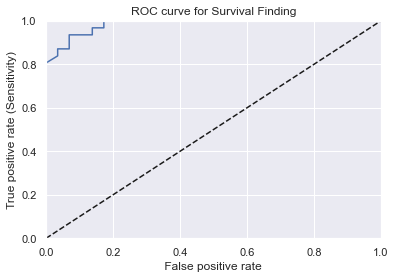

In [101]:
y_predicted_probs_yes=rf.predict_proba(X_test) #ROC Curve. Receiver operating characteristics curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.9838709677419355

# Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(rf, X,y, cv=5)
print(score_rf)
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (score_rf.mean(), score_rf.std() * 2))

[0.8        0.88333333 0.85       0.76666667 0.78333333]
Naive Bayes Accuracy: 0.82 (+/- 0.09)


In [104]:
dt1 = {'y_pred': y_pred1, 'y_test': y_test}
Rf_frame = pd.DataFrame(dt1)
Rf_frame.head()

,y_pred,y_test
205,0,0
269,0,0
153,1,1
9,1,1
236,0,0


In [105]:
Rf_frame[Rf_frame['y_pred'] != Rf_frame['y_test']]

,y_pred,y_test
42,0,1
241,1,0
120,0,1
91,0,1
281,1,0


# Support Vector Machines

In [106]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_pred_svm,y_test)
print('Accuracy of Support Vector Machines: ',acc_svm)
cm_svm = confusion_matrix (y_test, y_pred_svm)
print('Confusion matrix Support Vector Machines: \n',cm_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print('Classification report Support Vector Machines: \n',cr_svm)
pr_svm = precision_score(y_test,y_pred_svm)
re_svm = recall_score(y_test,y_pred_svm)
f1_svm = f1_score(y_test,y_pred_svm)

Accuracy of Support Vector Machines:  0.85
Confusion matrix Support Vector Machines: 
 [[23  6]
 [ 3 28]]
Classification report Support Vector Machines: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.82      0.90      0.86        31

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



#  Plotting Data

In [107]:
def plot_data(col1,col2):
  figg = plt.figure(figsize=(15,8))
  plt.scatter(df[df['output']==0][col1],df[df['output']==0][col2],25,color='red',marker='*',edgecolor='black')
  plt.scatter(df[df['output']==1][col1],df[df['output']==1][col2],25,color='goldenrod',marker='o',edgecolor='black')
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

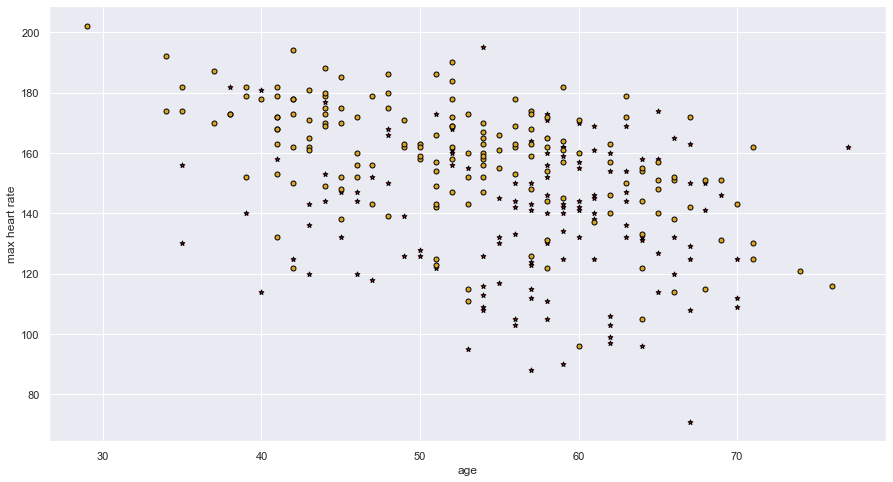

In [108]:
plot_data('age','max heart rate')

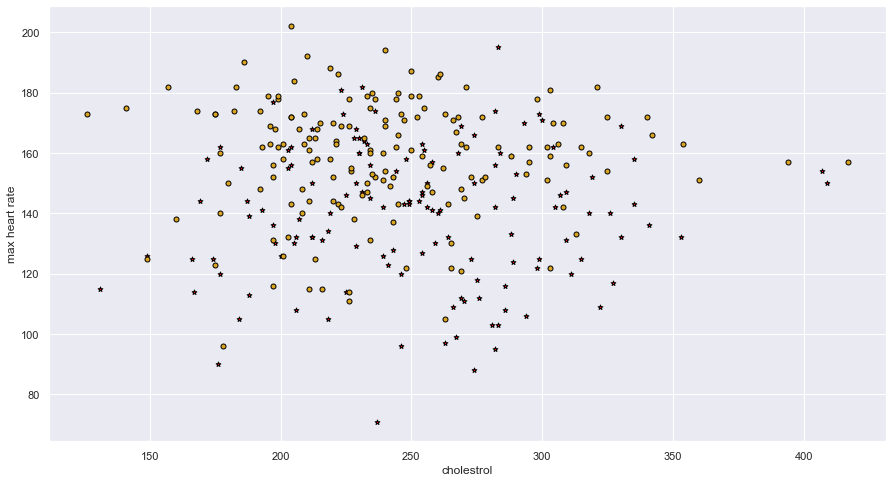

In [109]:
plot_data('cholestrol','max heart rate')

In [110]:
dt = {'y_pred': y_pred_svm, 'y_test': y_test}
SVM_frame = pd.DataFrame(dt)
SVM_frame.head()

,y_pred,y_test
205,0,0
269,0,0
153,1,1
9,1,1
236,0,0


In [111]:
SVM_frame[SVM_frame['y_pred'] != SVM_frame['y_test']]

,y_pred,y_test
229,1,0
183,1,0
42,0,1
298,1,0
158,0,1
241,1,0
120,0,1
289,1,0
281,1,0


# Model Evaluation

# Results To A DataFrame

In [112]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "DECISION TREE", "NAIVE BAYES",'RANDOM FOREST','SUPPORT VECTOR MACHINES'],
"ACCURACY SCORE " : [acc_lr, acc_knn, acc_dtc,acc_naive,acc_rf,acc_svm],
          "CONFUSION MATRIX" :[cm_lr, cm_knn, cm_dtc, cm_naive,cm_rf,cm_svm],
             "PRECISION SCORE" :[pr_lr, pr_knn, pr_dtc, pr_naive,pr_rf,pr_svm],
           'F1_SCORE':[f1_lr,f1_knn,f1_dtc,f1_naive,f1_rf,f1_svm]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,CONFUSION MATRIX,PRECISION SCORE,F1_SCORE
0,LOGISTIC REGRESSION,0.883333,"[[25, 4], [3, 28]]",0.875000,0.888889
1,K-NN,0.900000,"[[24, 5], [1, 30]]",0.857143,0.909091
2,DECISION TREE,0.800000,"[[24, 5], [7, 24]]",0.827586,0.800000
3,NAIVE BAYES,0.916667,"[[27, 2], [3, 28]]",0.933333,0.918033
4,RANDOM FOREST,0.916667,"[[27, 2], [3, 28]]",0.933333,0.918033
5,SUPPORT VECTOR MACHINES,0.850000,"[[23, 6], [3, 28]]",0.823529,0.861538


# GridSearchCV

In [120]:
model = LogisticRegression()
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [121]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [122]:
from sklearn.model_selection import GridSearchCV

def best_model_using_GridSearchCV(X,y):
  algorithms = {
      'logistic_regression':{
            'model' : LogisticRegression(solver = 'liblinear',multi_class='auto'),
            'params' : {
                'C' : [0.1,0.5,1]}
        },
      'SVM' : {
          'model' : SVC(gamma = 'auto'),
          'params' : {
              'C' : [1,2,3],
              'kernel' : ['rbf','linear','sigmoid','poly']}
      },
       'random_forest':{
            'model' : RandomForestClassifier(),
            'params':{
                'n_estimators':[1,5]}
       },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']}
        }
  }

  scores = []
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

  for algorithm_name, configuration in algorithms.items():
      gs = GridSearchCV(configuration['model'], configuration['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model' : algorithm_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_})
      return pd.DataFrame(scores, columns=['model','best_score','best_params'])
      
      
best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,logistic_regression,0.876667,{'C': 0.5}
